In [ ]:
#we will compare different SVM kernels (Linear, RBF, Polynomial) on synthetic data
# and visualize their decision boundaries in 3D.

In [9]:
#1.required libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles, make_moons, make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# For good visuals
# Set theme and context for clean visuals
sns.set_theme(style="darkgrid")       
sns.set_context('notebook')         


In [10]:
# 2. non-linear stynthetic Data genration

from sklearn.datasets import make_moons, make_circles
dataset_type='moons'
x,y=make_moons(n_samples=300,noise=0.2,random_state=42)

#scaling to improve performance of svm
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

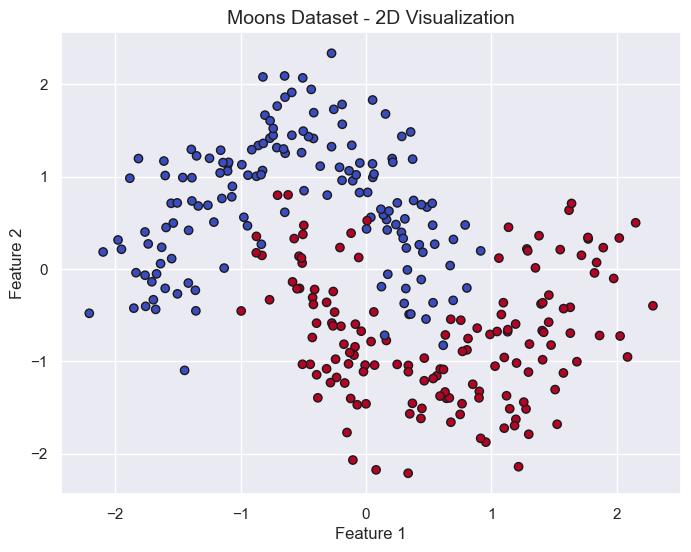

In [11]:
#3. visualizing the synthetic data in 2D
plt.figure(figsize=(8,6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title(f"{dataset_type.capitalize()} Dataset - 2D Visualization", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [21]:
# linear model won’t be able to separate this easily we'll need to use non_linear kernels 
#4.training svm(Linear,RBF,Poly)
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_scaled,y)

svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(x_scaled,y)

svm_poly=SVC(kernel='poly', degree=3)
svm_poly.fit(x_scaled,y)



SVC(kernel='poly')

In [22]:
 #descision Boundary PLot Function
def plot_decision_boundary (model,x,y,title,ax):
    h=0.02
#plot covers the entire area where data lies and slightly more
    x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
    y_min,y_max=x[:,1].min()-1,x[:,1].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.6)
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

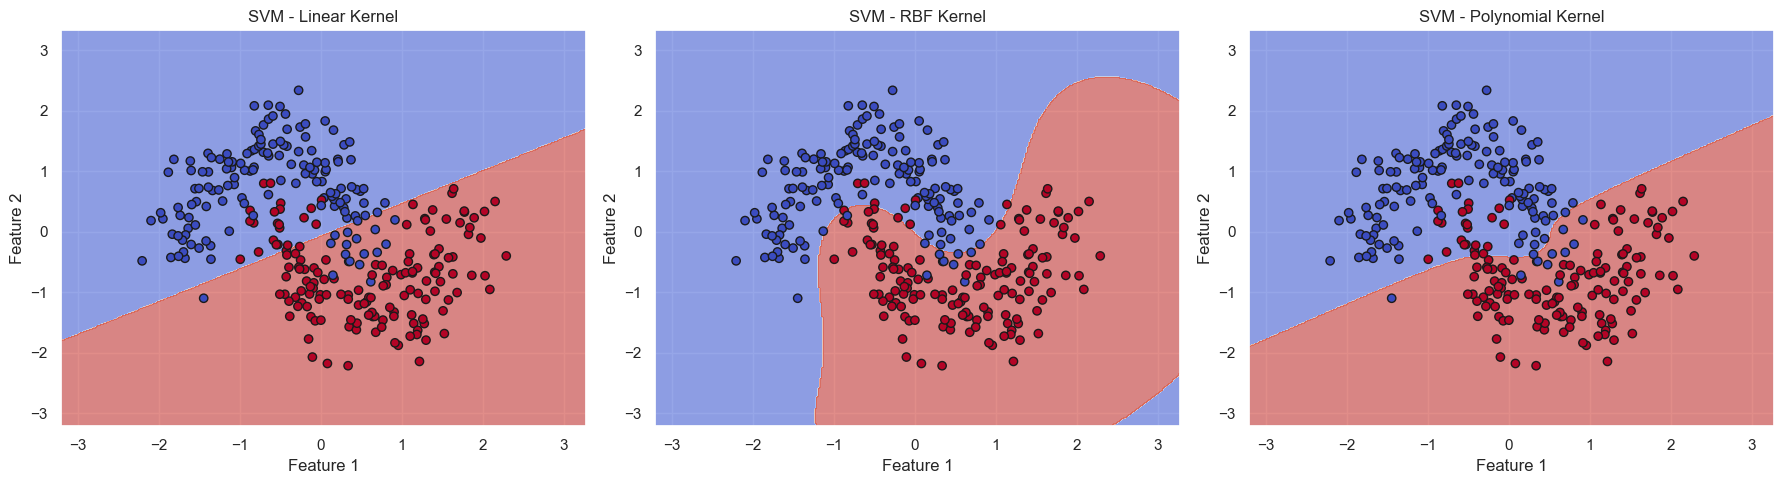

In [23]:
# Visualizing decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(svm_linear, x_scaled, y, "SVM - Linear Kernel", axes[0])
plot_decision_boundary(svm_rbf, x_scaled, y, "SVM - RBF Kernel", axes[1])
plot_decision_boundary(svm_poly, x_scaled, y, "SVM - Polynomial Kernel", axes[2])

plt.tight_layout()
plt.show()


In [ ]:
#tested all three kernels manually after scaling. RBF and polynomial handled the non-linearity well. Linear couldn't."

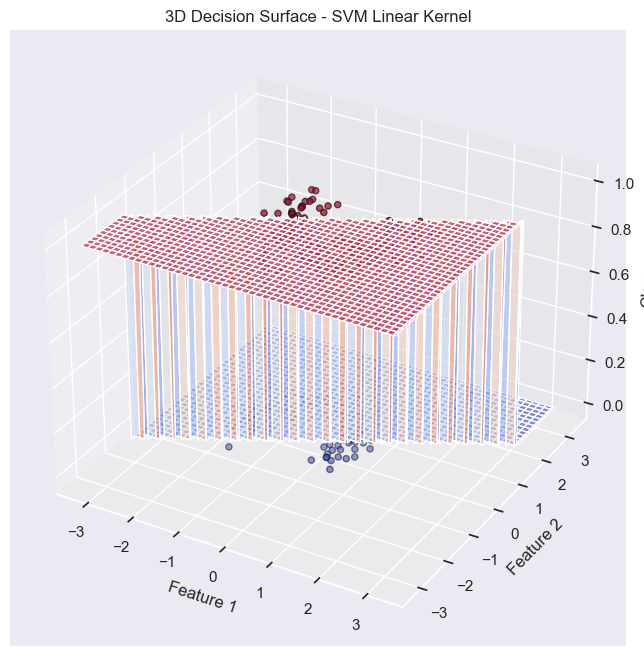

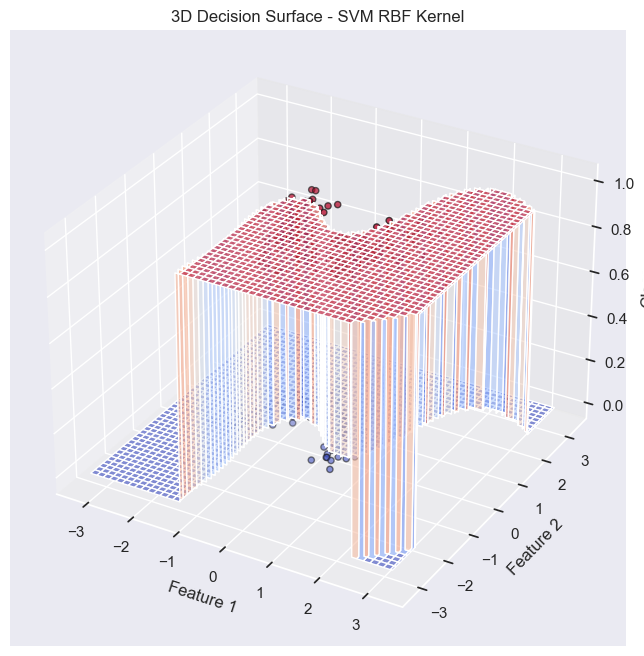

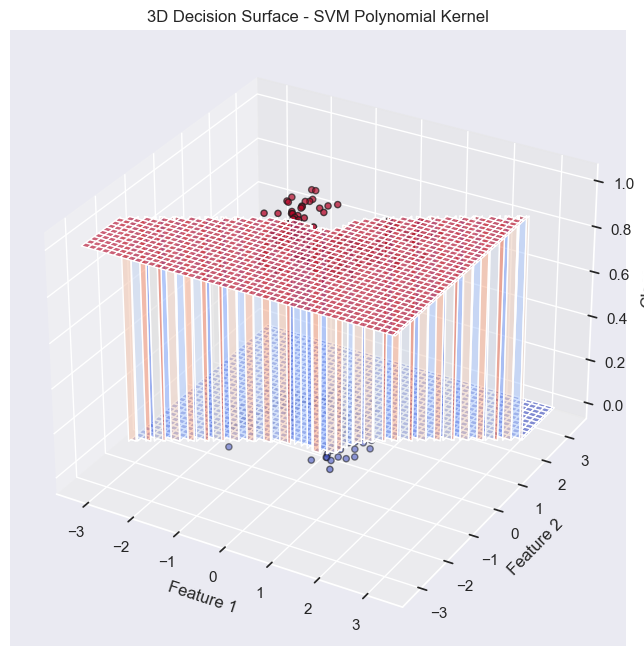

In [34]:
#3d visualzation
def plot_3d_decision_surface(model, X, y, title):
    
    # Create a meshgrid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict using the model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the decision surface
    surf = ax.plot_surface(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Class')
    ax.set_title(title)
    
    plt.show()

# Linear
plot_3d_decision_surface(svm_linear, x_scaled, y, "3D Decision Surface - SVM Linear Kernel")

# RBF
plot_3d_decision_surface(svm_rbf, x_scaled, y, "3D Decision Surface - SVM RBF Kernel")

# Polynomial
plot_3d_decision_surface(svm_poly, x_scaled, y, "3D Decision Surface - SVM Polynomial Kernel")


 Linear Kernel Accuracy: 0.87


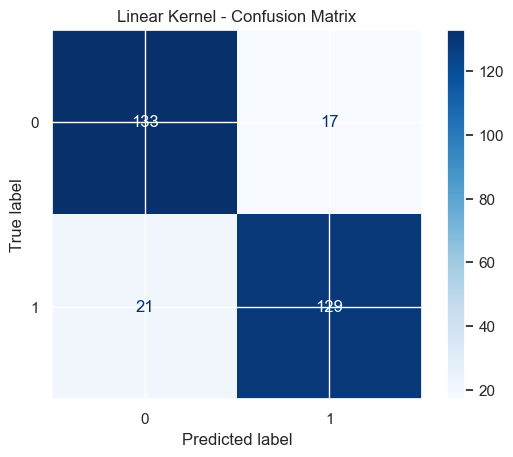

 RBF Kernel Accuracy: 0.94


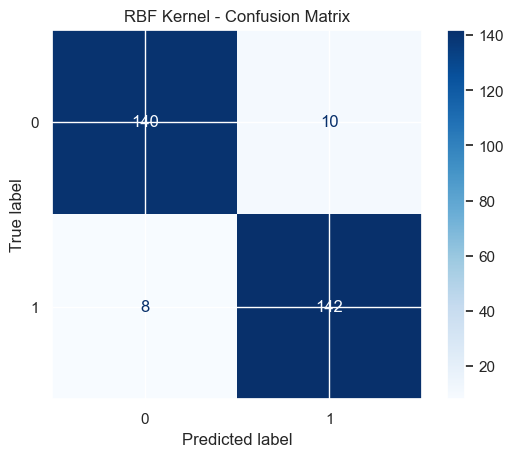

 Polynomial Kernel Accuracy: 0.88


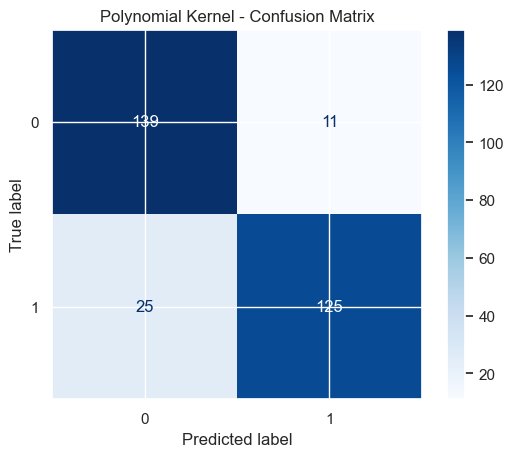

In [35]:
#Accuracy and confusion matrix 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Define models in a dictionary for looped evaluation
models = {
    "Linear Kernel": svm_linear,
    "RBF Kernel": svm_rbf,
    "Polynomial Kernel": svm_poly
}

# Evaluate all
for name, model in models.items():
    y_pred = model.predict(x_scaled)
    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)

    print(f" {name} Accuracy: {acc:.2f}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [40]:
# hyperpramter tuning using grid search cv 
#rbf
from sklearn.model_selection import GridSearchCV

# Grid for RBF
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1]
}

svm_rbf_model = SVC(kernel='rbf')
grid_rbf = GridSearchCV(svm_rbf_model, param_grid_rbf, cv=5, scoring='accuracy', verbose=1)
grid_rbf.fit(x_scaled, y)

print(grid_rbf.best_params_)
print(grid_rbf.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 1, 'gamma': 1}
0.9633333333333333


In [46]:
#poly
# Grid for Polynomial
param_grid_poly = {
    'C': [0.1, 1, 10],
    'gamma': ['scale',0.01,0.1, 1],
    'degree': [2, 3, 4, 5]
}

svm_poly_model = SVC(kernel='poly')
grid_poly = GridSearchCV(svm_poly_model, param_grid_poly, cv=5, scoring='accuracy', verbose=1)
grid_poly.fit(x_scaled, y)

print(grid_poly.best_params_)
print(grid_poly.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'C': 10, 'degree': 5, 'gamma': 1}
0.8833333333333332


In [48]:
#linear 

param_grid_linear = {'C': [0.01, 0.1, 1, 10, 100]}
svm_linear = SVC(kernel='linear')
grid_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5)
grid_linear.fit(x_scaled, y)

print( grid_linear.best_params_)
print( grid_linear.best_score_)


{'C': 1}
0.8699999999999999


In [ ]:
#The RBF kernel delivered the best performance with 96% accuracy, effectively capturing the non-linear structure of the data.
#The Polynomial kernel followed with 88% accuracy, showing decent results after tuning.
#The Linear kernel lagged behind at 87%, confirming its limitations on non-linearly separable data.